#### <i> Sentiment Analysis of Social Media Data Business Insights and Consumer Behavior Trends in the USA </i>
#### <i> Import Library Files </i>

#### <i> Dataset Link --> https://www.kaggle.com/datasets/abdullah0a/social-media-sentiment-analysis-dataset  </i>

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")




#### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("synthetic_social_media_data.csv")
df

,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de
...,...,...,...,...,...,...,...,...,...,...
1995,ac186198-3993-43ef-87cf-ea30c4337660,Give word popular coach. Interview born moveme...,Negative,803,213,176,9306,2024-07-10 16:58:10,video,zh
1996,d24d1f3b-c0bf-491b-bdbe-6a494b38fe29,Her eye interesting matter certainly suddenly....,Neutral,211,227,179,8433,2024-02-02 02:39:45,text,de
1997,978f54ce-4967-4063-a106-1446c1f44285,War small want create new. Road society it mot...,Positive,533,194,147,6900,2024-01-30 17:04:23,image,en
1998,c26161d8-5e6d-4ad9-9592-ce9ed93c3c68,Member store put huge already hard me. Evidenc...,Neutral,494,63,24,4368,2024-07-11 00:49:01,video,es


#### <i> Dataset Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post ID              2000 non-null   object
 1   Post Content         2000 non-null   object
 2   Sentiment Label      2000 non-null   object
 3   Number of Likes      2000 non-null   int64 
 4   Number of Shares     2000 non-null   int64 
 5   Number of Comments   2000 non-null   int64 
 6   User Follower Count  2000 non-null   int64 
 7   Post Date and Time   2000 non-null   object
 8   Post Type            2000 non-null   object
 9   Language             2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB


In [4]:
df.describe()

,Number of Likes,Number of Shares,Number of Comments,User Follower Count
count,2000.000000,2000.00000,2000.000000,2000.000000
mean,503.379000,248.48500,102.805000,5005.777000
std,283.210866,145.09499,58.032886,2913.865254
min,1.000000,0.00000,0.000000,3.000000
25%,267.000000,121.00000,52.000000,2383.250000
50%,505.000000,248.50000,104.500000,5048.500000
75%,740.000000,375.00000,153.250000,7556.500000
max,1000.000000,500.00000,200.000000,9999.000000


In [5]:
# ----- Handle Missing Values -----
df = df.drop(['Post ID'], axis=1)

# Check for missing values
print(df.isnull().sum())
# Drop or fill missing values if necessary
df = df.dropna()

Post Content           0
Sentiment Label        0
Number of Likes        0
Number of Shares       0
Number of Comments     0
User Follower Count    0
Post Date and Time     0
Post Type              0
Language               0
dtype: int64


#### <i> Data Visulization And Analysis </i>

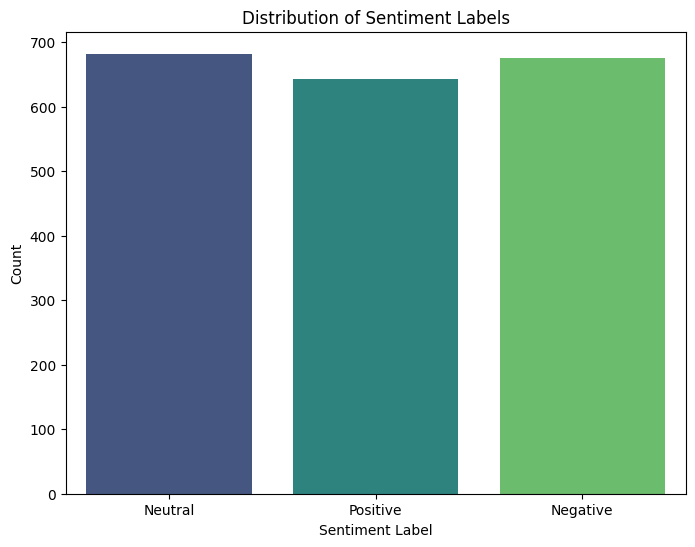

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Visualization -----

# 1. Sentiment Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment Label', data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

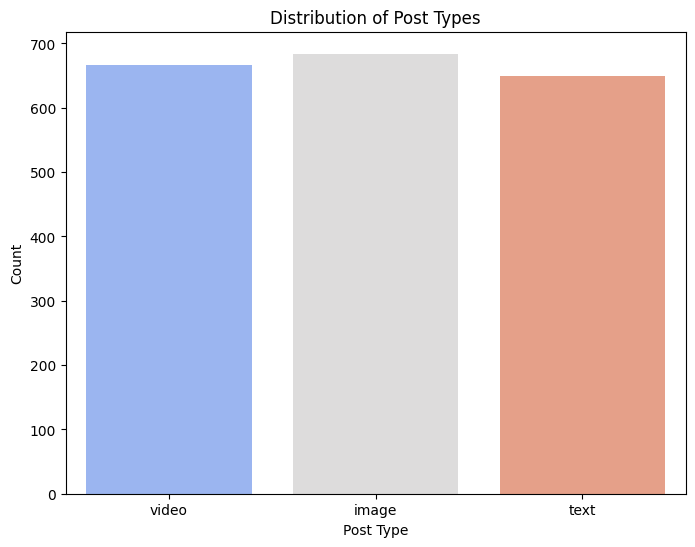

In [7]:
# 2. Post Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Post Type', data=df, palette='coolwarm')
plt.title('Distribution of Post Types')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.show()


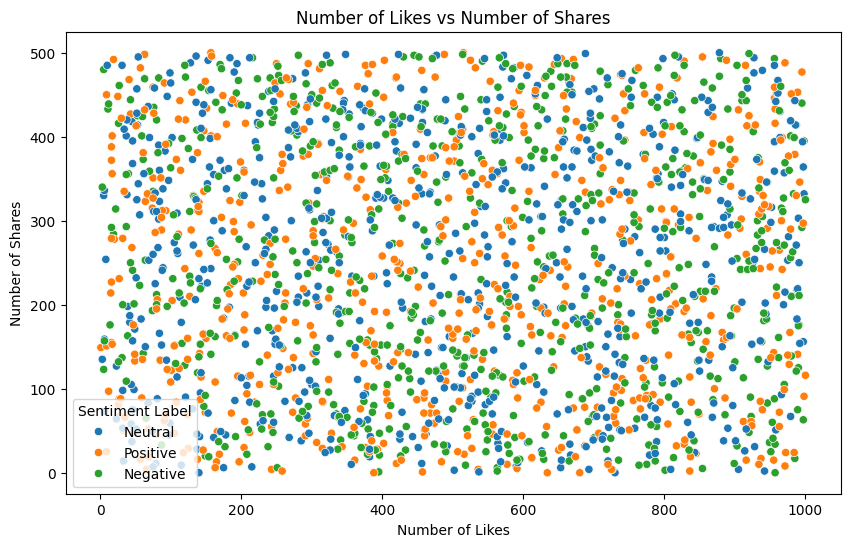

In [8]:
# 4. Likes vs Shares Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Likes', y='Number of Shares', hue='Sentiment Label', data=df, palette='tab10')
plt.title('Number of Likes vs Number of Shares')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Shares')
plt.legend(title='Sentiment Label')
plt.show()

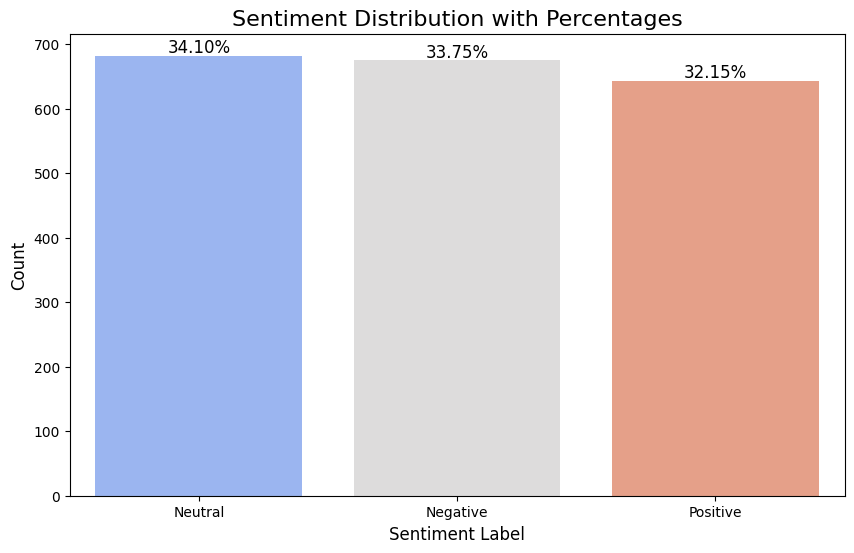

In [9]:
from wordcloud import WordCloud

# ----- Advanced Visualizations -----

# 1. Sentiment Distribution with Percentage Annotations
plt.figure(figsize=(10, 6))
sentiment_counts = df['Sentiment Label'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
for i, val in enumerate(sentiment_counts.values):
    plt.text(i, val + 5, f"{(val / len(df) * 100):.2f}%", ha='center', fontsize=12, color='black')
plt.title('Sentiment Distribution with Percentages', fontsize=16)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

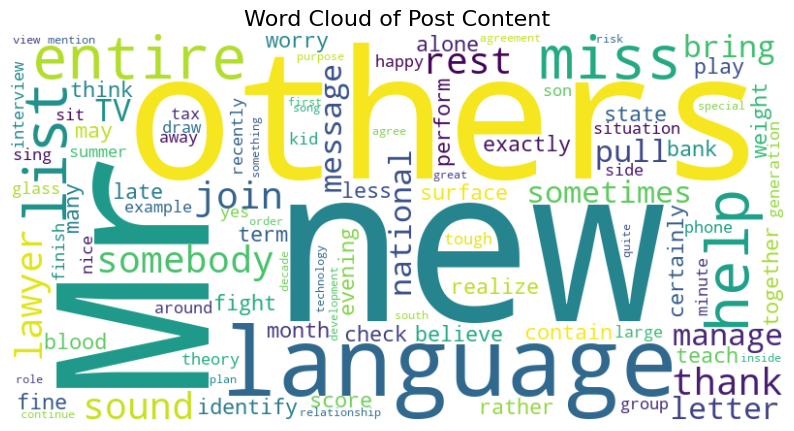

In [10]:
# 3. Word Cloud of Post Content
from wordcloud import STOPWORDS

# Combine all post content into one string
text = " ".join(content for content in df['Post Content'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='viridis', max_words=100, width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Content', fontsize=16)
plt.show()


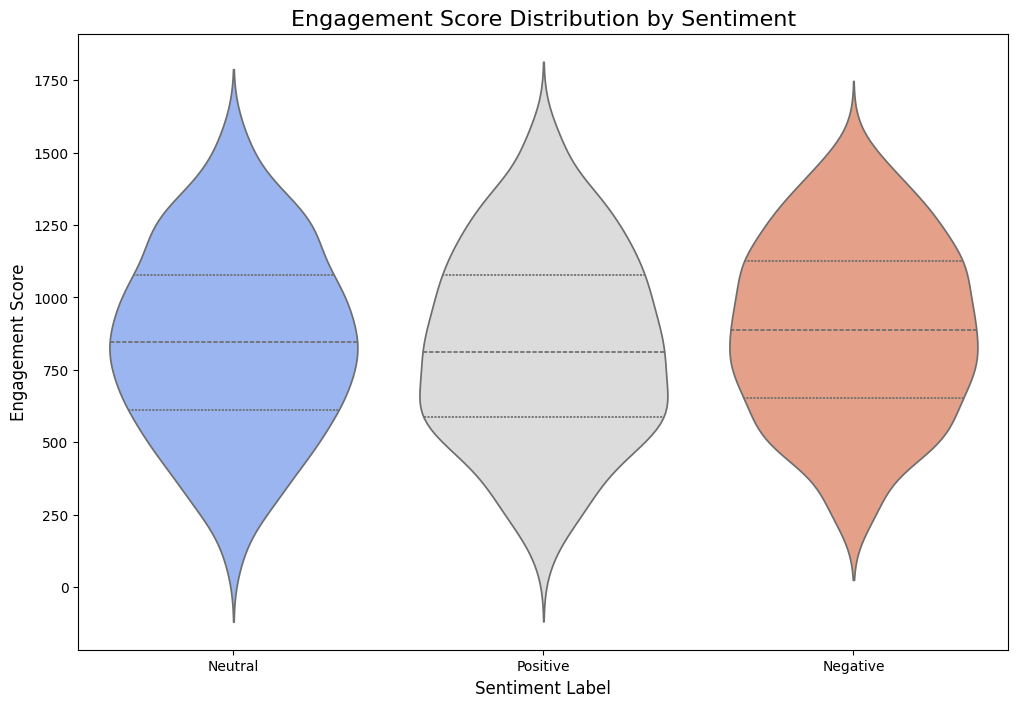

In [11]:
# 5. Engagement Score (Composite Metric)
df['Engagement Score'] = df['Number of Likes'] + df['Number of Shares'] + df['Number of Comments']

plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Sentiment Label', y='Engagement Score', palette='coolwarm', inner='quartile')
plt.title('Engagement Score Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.show()


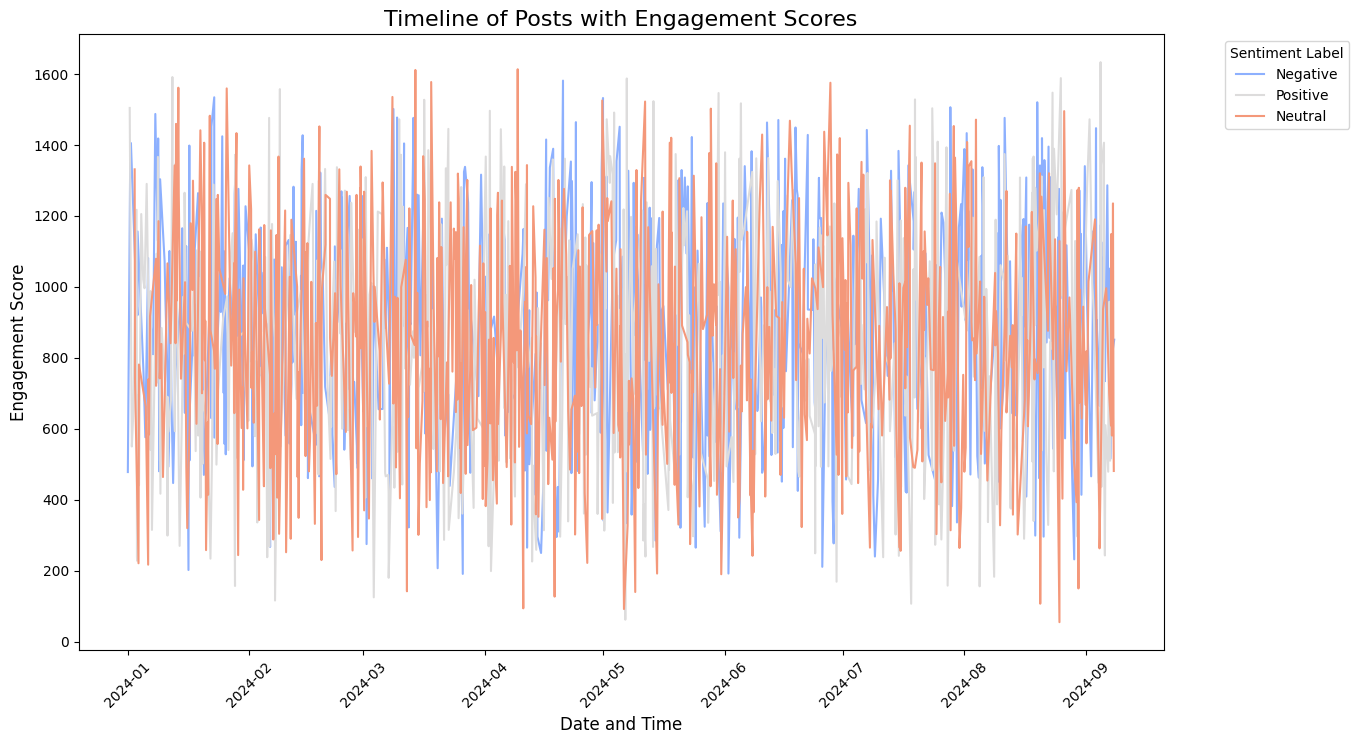

In [12]:
# 6. Timeline of Posts with Engagement
df['Post Date and Time'] = pd.to_datetime(df['Post Date and Time'])
df_sorted = df.sort_values(by='Post Date and Time')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_sorted, x='Post Date and Time', y='Engagement Score', hue='Sentiment Label', palette='coolwarm')
plt.title('Timeline of Posts with Engagement Scores', fontsize=16)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

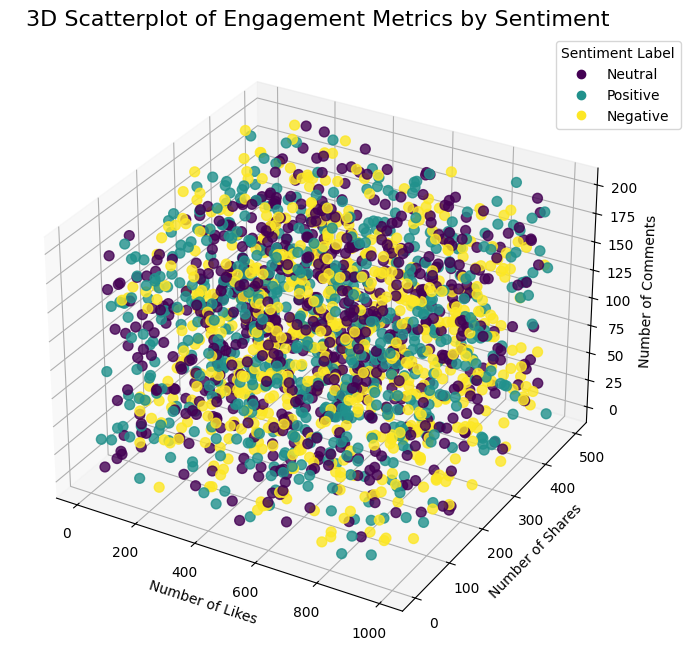

In [13]:
# 7. Likes vs. Shares vs. Comments (3D Scatterplot)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['Number of Likes'], 
    df['Number of Shares'], 
    df['Number of Comments'], 
    c=pd.factorize(df['Sentiment Label'])[0], 
    cmap='viridis', s=50, alpha=0.8
)

ax.set_title('3D Scatterplot of Engagement Metrics by Sentiment', fontsize=16)
ax.set_xlabel('Number of Likes')
ax.set_ylabel('Number of Shares')
ax.set_zlabel('Number of Comments')

# Add legend
legend_labels = df['Sentiment Label'].unique()
legend_colors = [scatter.cmap(scatter.norm(i)) for i in range(len(legend_labels))]
for label, color in zip(legend_labels, legend_colors):
    ax.plot([], [], 'o', label=label, color=color)
ax.legend(title='Sentiment Label', bbox_to_anchor=(1.1, 1))
plt.show()

#### <i> Data Preprocessing </i>

In [14]:
# ----- Date and Time Features -----
# Convert 'Post Date and Time' to datetime format
df['Post Date and Time'] = pd.to_datetime(df['Post Date and Time'])

# Extract useful features from the datetime column
df['Post Year'] = df['Post Date and Time'].dt.year
df['Post Month'] = df['Post Date and Time'].dt.month
df['Post Day'] = df['Post Date and Time'].dt.day
df['Post Hour'] = df['Post Date and Time'].dt.hour
df['Post Day of Week'] = df['Post Date and Time'].dt.dayofweek

# Drop the original datetime column if not needed
df.drop('Post Date and Time', axis=1, inplace=True)

In [15]:
# ----- Text Preprocessing -----
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W|\d', ' ', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

df['Cleaned Post Content'] = df['Post Content'].apply(preprocess_text)

In [16]:
# ----- Label Encoding for Categorical Columns -----
label_encoder = LabelEncoder()

df['Sentiment Label Encoded'] = label_encoder.fit_transform(df['Sentiment Label'])
df['Post Type Encoded'] = label_encoder.fit_transform(df['Post Type'])
df['Language Encoded'] = label_encoder.fit_transform(df['Language'])

# Drop original columns if no longer needed
df.drop(['Post Content', 'Sentiment Label', 'Post Type', 'Language'], axis=1, inplace=True)


In [17]:
# ----- Feature Scaling for Numerical Columns -----
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Number of Likes', 'Number of Shares', 'Number of Comments', 'User Follower Count']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [18]:
# ----- TF-IDF Vectorization -----
tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(df['Cleaned Post Content']).toarray()

# Combine numerical features with text features
X_numerical = df.drop('Cleaned Post Content', axis=1).values
X = np.hstack((X_text, X_numerical))

# Target Variable
y = df['Sentiment Label Encoded']

# ----- Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Preprocessing complete. Ready for modeling!")

Preprocessing complete. Ready for modeling!


#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       136
           2       1.00      1.00      1.00       129

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[135   0   0]
 [  0 136   0]
 [  0   0 129]]


#### <i> Random Forest Classifier </i>


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       0.99      1.00      1.00       136
           2       1.00      0.99      1.00       129

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[135   0   0]
 [  0 136   0]
 [  0   1 128]]


#### <i> XGBoost </i>

In [21]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       136
           2       1.00      1.00      1.00       129

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[135   0   0]
 [  0 136   0]
 [  0   0 129]]



Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    1.0000   1.000000  1.0000    1.0000
2              XGBoost    1.0000   1.000000  1.0000    1.0000
1        Random Forest    0.9975   0.997518  0.9975    0.9975


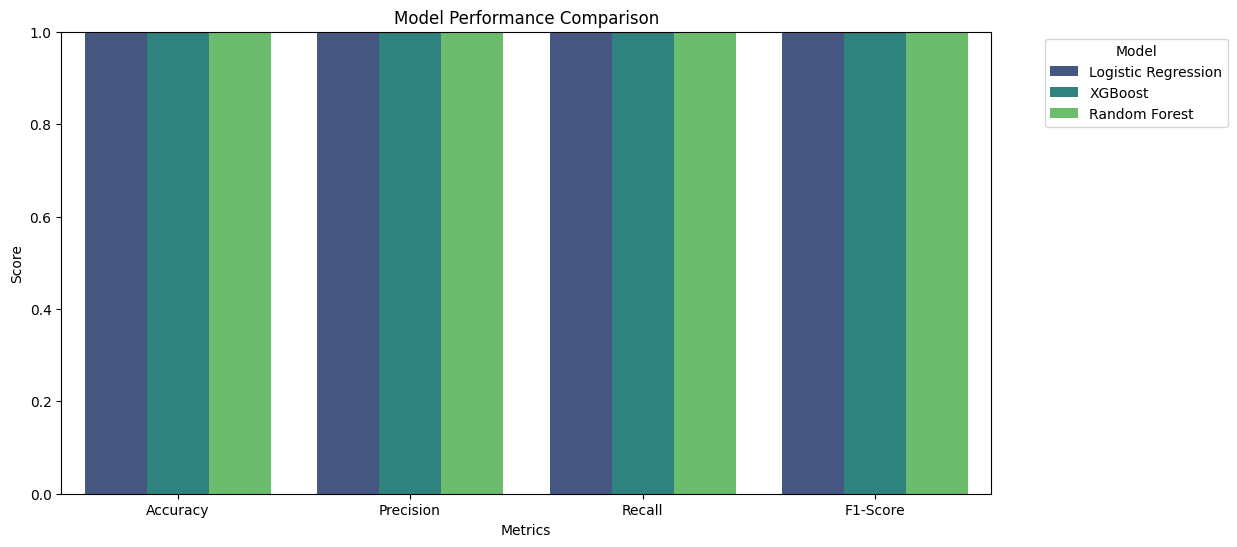

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Evaluate Logistic Regression
log_reg_results = evaluate_model("Logistic Regression", y_test, y_pred_log)

# Evaluate Random Forest
rf_results = evaluate_model("Random Forest", y_test, y_pred_rf)

# Evaluate XGBoost
xgb_results = evaluate_model("XGBoost", y_test, y_pred_xgb)

# Consolidate results
results = pd.DataFrame([log_reg_results, rf_results, xgb_results])

# Sort by F1-Score to find the best model
results_sorted = results.sort_values(by="F1-Score", ascending=False)

# Print results
print("\nModel Comparison:")
print(results_sorted)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Melt data for visualization
results_melted = results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.ylim(0, 1)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
